## Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/cleaned_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1


In [ ]:
#converting into labeled dataset having only two label categories
#Popular vs. Not Popular: Based on a threshold of installs.

threshold = 100000
df['Label'] = df['Installs'].apply(lambda x: 'Popular' if x >= threshold else 'Not Popular')

In [ ]:
df = df.drop(columns=['App', 'Last Updated', 'Current Version'])

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,4.4,Popular
1,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2.3,Not Popular
2,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,4.2,Popular
3,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,3.0,Popular
4,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,4.1,Popular


In [ ]:
df.to_csv('labeled_data.csv', index=False)

In [ ]:
#Encoding categorical variables to numerical values
label_encoder = LabelEncoder()


df['Category'] = label_encoder.fit_transform(df['Category'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])
df['Genres'] = label_encoder.fit_transform(df['Genres'])
df['Type'] = label_encoder.fit_transform(df['Type'])

In [ ]:
#Scaling numeric features using StandardScaler
scaler = StandardScaler()
df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Version']] = scaler.fit_transform(
    df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Version']]
)

In [ ]:
#Using 'Label' as the binary target
X = df.drop(columns=['Label'])
y = df['Label']

In [ ]:
y = y.map({'Popular': 1, 'Not Popular': 0})

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7724137931034483

Confusion Matrix:
 [[654  57]
 [273 466]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80       711
           1       0.89      0.63      0.74       739

    accuracy                           0.77      1450
   macro avg       0.80      0.78      0.77      1450
weighted avg       0.80      0.77      0.77      1450



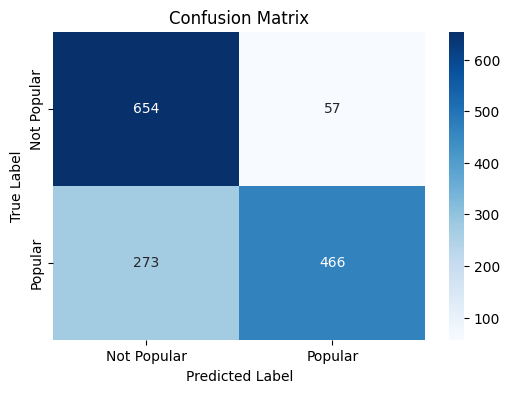

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Multinomial Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(X_train_scaled, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

In [ ]:
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("\nConfusion Matrix (Multinomial Naive Bayes):\n", conf_matrix_nb)
print("\nClassification Report (Multinomial Naive Bayes):\n", class_report_nb)

Multinomial Naive Bayes Accuracy: 0.5779310344827586

Confusion Matrix (Multinomial Naive Bayes):
 [[161 550]
 [ 62 677]]

Classification Report (Multinomial Naive Bayes):
               precision    recall  f1-score   support

           0       0.72      0.23      0.34       711
           1       0.55      0.92      0.69       739

    accuracy                           0.58      1450
   macro avg       0.64      0.57      0.52      1450
weighted avg       0.64      0.58      0.52      1450



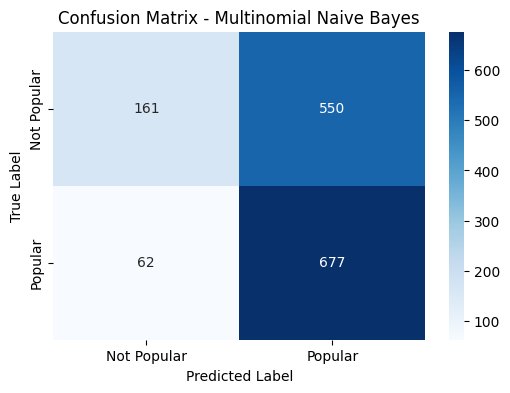

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()